**Employee Performance Analysis - INX Future Inc**

**Business Problem**

The business problem is a binary classification problem. The goal is to predict performance Rating on the Basis of different Features.

**Import Basic Python Packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing Raw Data**

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df1=pd.DataFrame(df)

In [3]:
df1.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


**Exploratory Data Analysis**

In [4]:
df1.shape

(1200, 28)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
df1.isnull().sum()      #Checking Null value Availability

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
df1.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [8]:
df1.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


**Handling Duplicates**

In [9]:
df1.duplicated().sum()

0

**Domain Analysis:**

Here we have a dataset with 1200 records and 28 features (including the PerformanceRating)


*   **EmpNumber:** Unique employee number for identification.

*   **Age:** Age of the employee.

*   **Gender:**Gender of the employee (Male/Female).

*   **EducationBackground:** Educational background of the employee.

*   **MaritalStatus:** Marital status of the employee (Married/Single/Divorced).

*   **EmpDepartment:** Department in which the employee works.

*   **EmpJobRole:** Job role of the employee.

*   **BusinessTravelFrequency:** Frequency of business travel (Travel_Frequently/Travel_Rarely/Non-Travel).

*   **DistanceFromHome:** Distance from home to workplace.

*   **EmpEducationLevel:** Level of education of the employee.

*   **EmpEnvironmentSatisfaction:** Satisfaction level with the work environment.

*   **EmpHourlyRate:** Hourly rate of the employee.

*  **EmpJobInvolvement:** Level of involvement in the job.

*  **EmpJobLevel:** Job level of the employee.

*   **EmpJobSatisfaction:** Satisfaction level with the job.

*   **NumCompaniesWorked:** Number of companies the employee has worked for.

*   **OverTime:** Whether the employee works overtime (Yes/No).

*   **EmpLastSalaryHikePercent:** Percentage of the last salary hike.

*   **EmpRelationshipSatisfaction:** Satisfaction level with work relationships.

*   **TotalWorkExperienceInYears**: Total work experience of the employee in years.

*   **TrainingTimesLastYear:** Number of training sessions attended last year.

*   **EmpWorkLifeBalance:** Work-life balance satisfaction level.

*   **ExperienceYearsAtThisCompany:** Number of years the employee has worked at this company.

*   **ExperienceYearsInCurrentRole:** Number of years the employee has worked in the current role.

*   **YearsSinceLastPromotion:** Number of years since the last promotion.

*   **YearsWithCurrManager:** Number of years with the current manager.

*   **Attrition:** Whether the employee has left the company (Yes/No).

*   **PerformanceRating:** Performance rating of the employee.

**Visualization**

#Univariate Analysis

## 1.Age

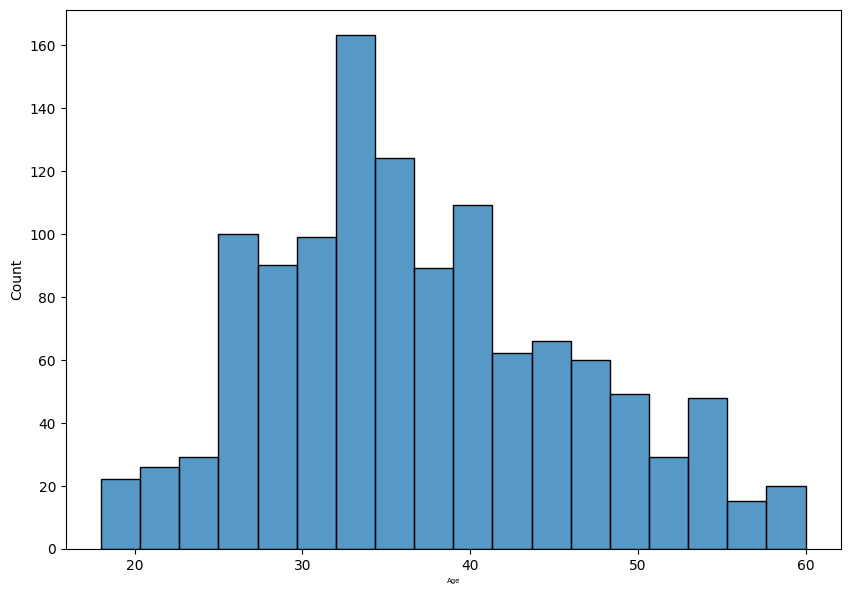

In [10]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=df1)
plt.xlabel('Age',fontsize=5)
plt.show()

**Observation**:

The range of age between 18 to 60, most of the employee age between 25 to 40.


**2.Employee Hourly Rate**

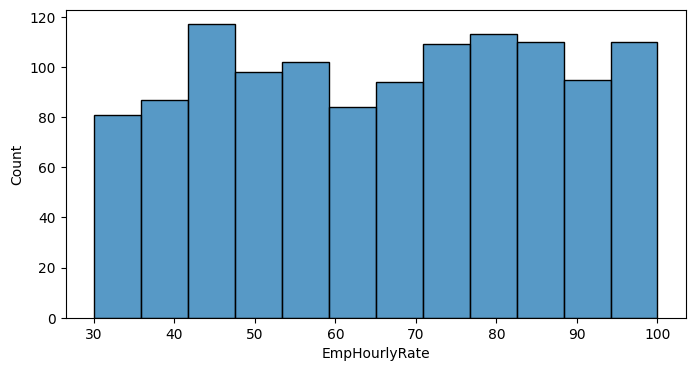

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(x='EmpHourlyRate',data=df1)
plt.xlabel('EmpHourlyRate',fontsize=10)
plt.show()


**Observation**

The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45.

**3.Total Work Experience In year**

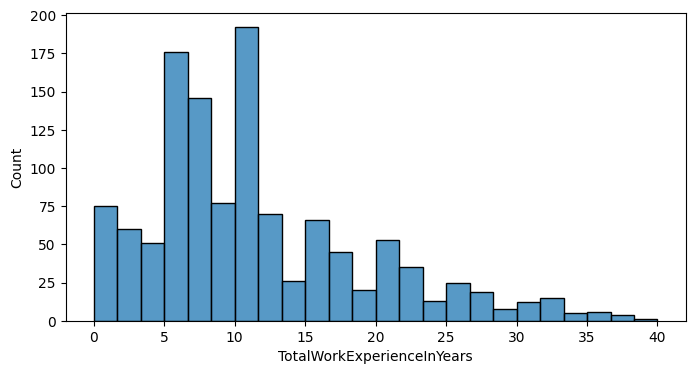

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(x='TotalWorkExperienceInYears',data=df1)
plt.xlabel('TotalWorkExperienceInYears',fontsize=10)
plt.show()

**Observation:** Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

**4.Experience Years At This Company**

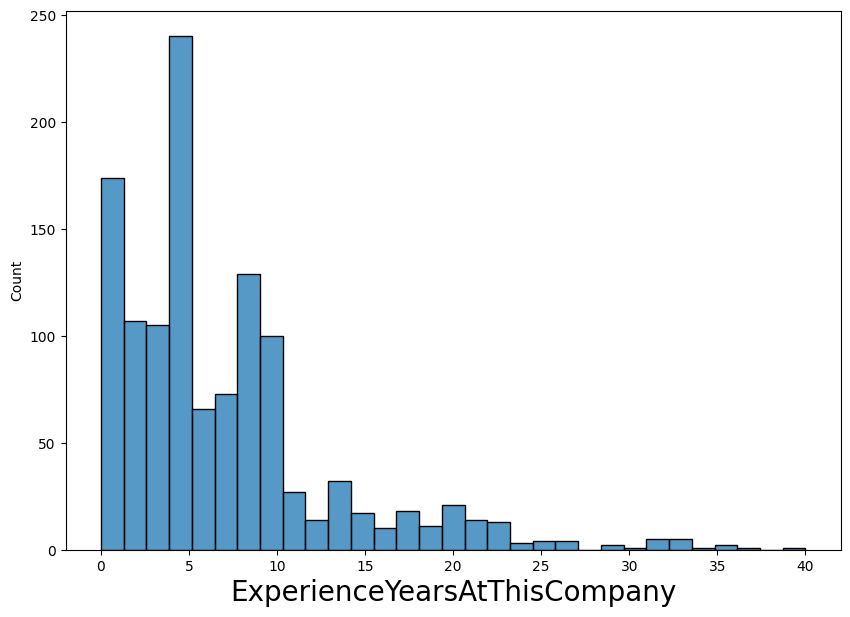

In [13]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=df1)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

**Observation:** The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.

**Use subplot to plot multiple featur**

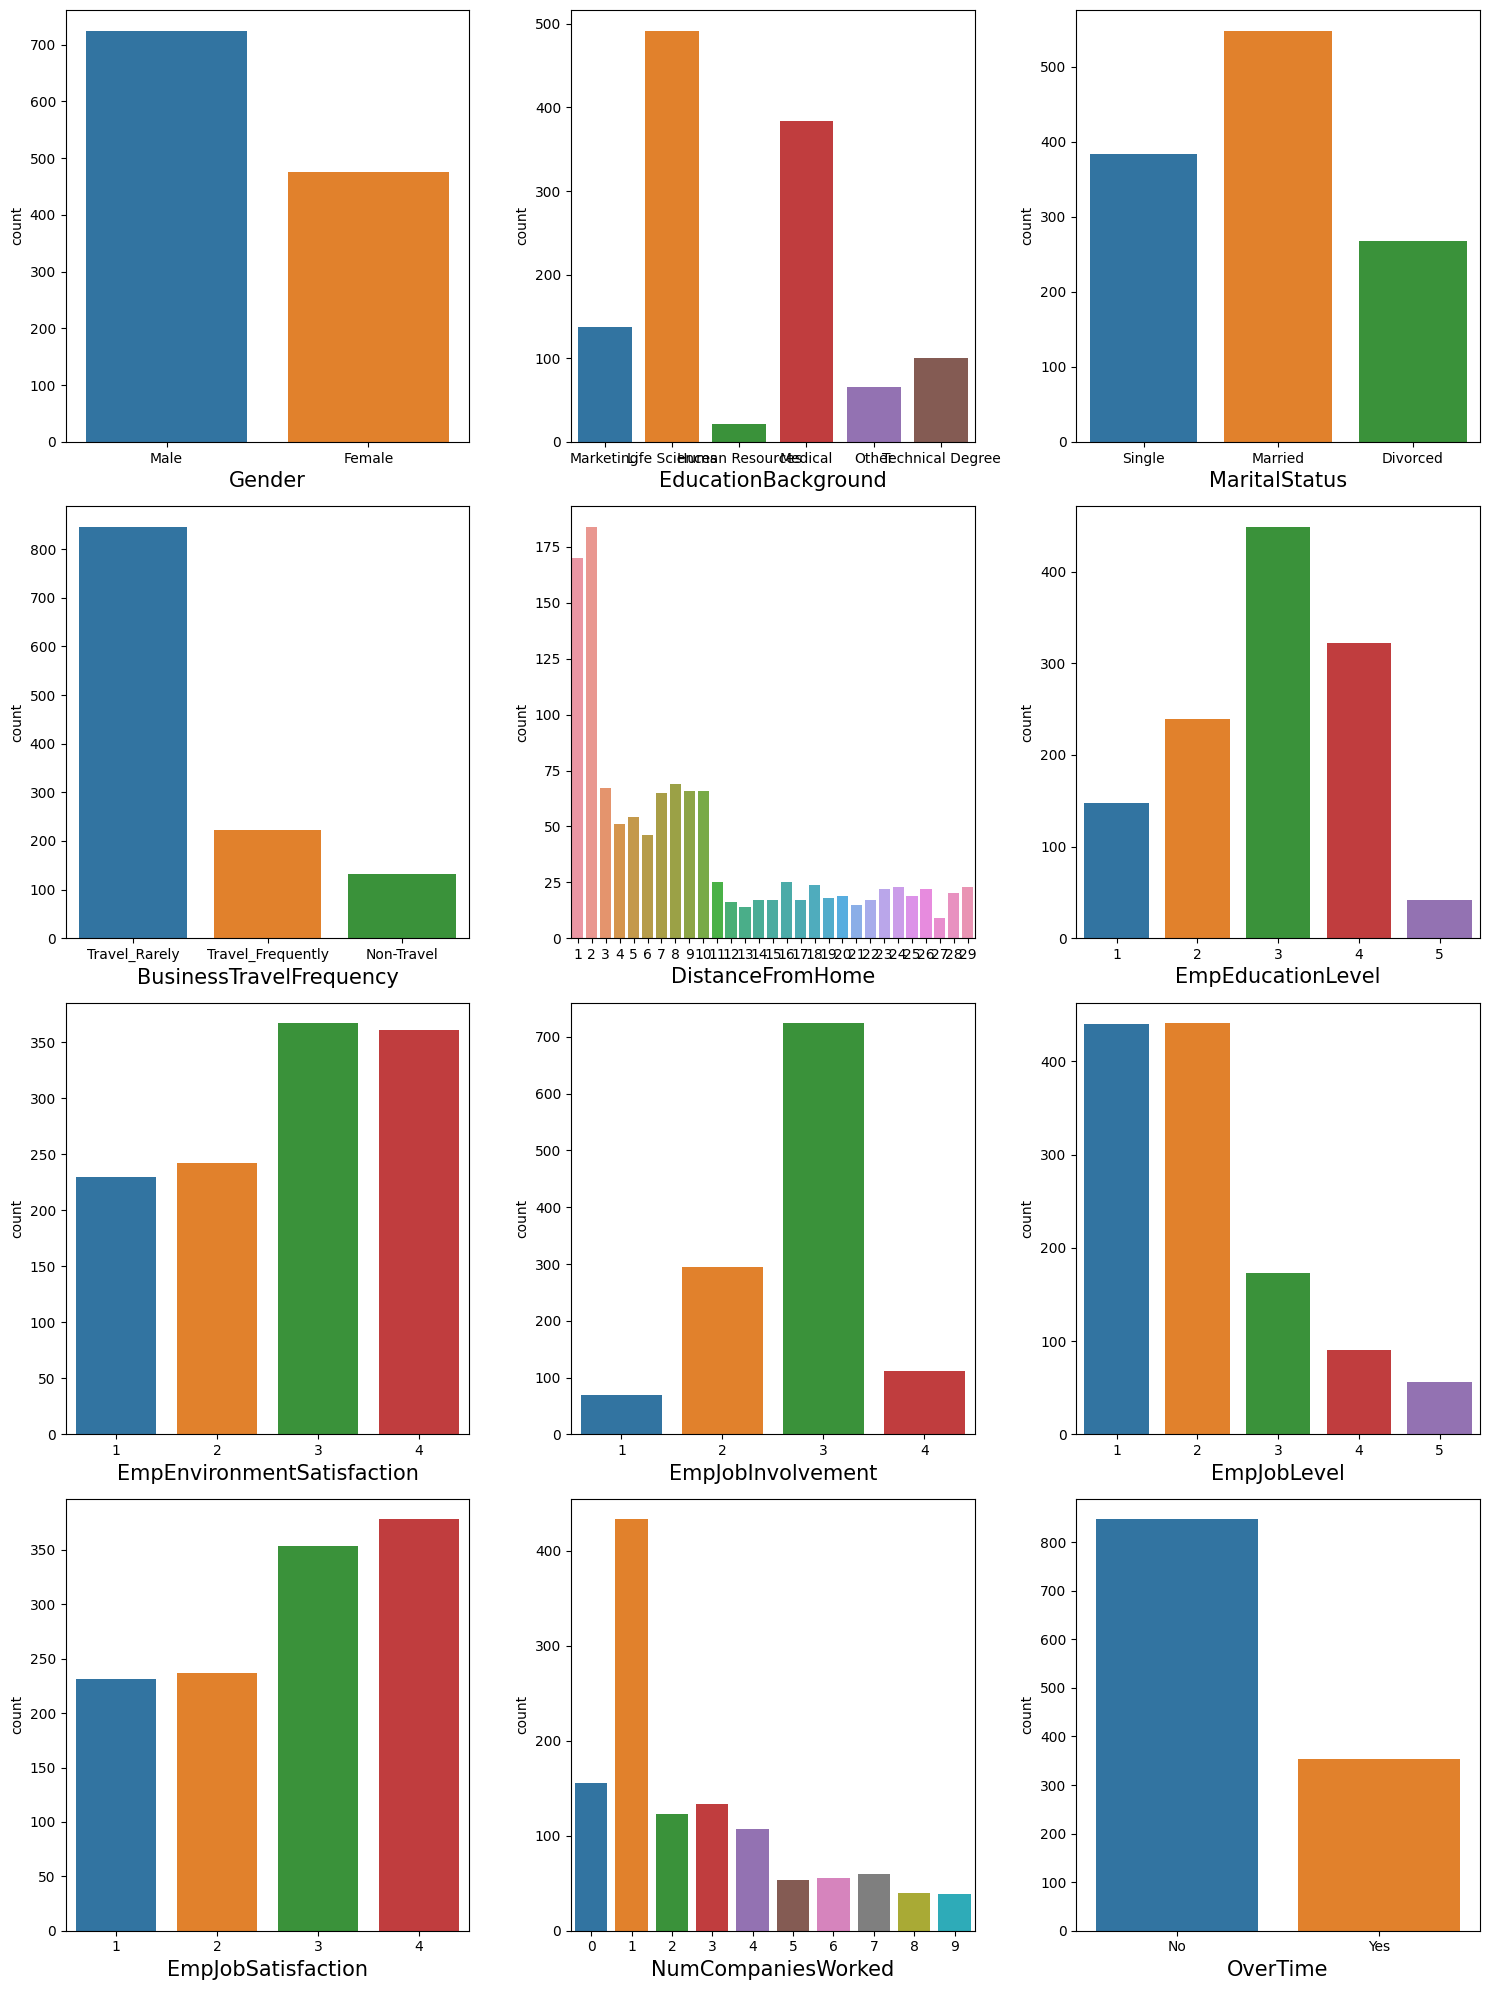

In [14]:
count = df1[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']]
plt.figure(figsize=(15,20))
plotno = 1

for column in count:
    if plotno<=13:
        plt.subplot(4,3,plotno)
        sns.countplot(x=count[column])
        plt.xlabel(column,fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

**Observation:**

**5.Gender:**


*   Most of the male present in the comapany.

**6.Education Background:**

*   most of the employee education background is Life science
and medical, as well as marketing eduaction background employee is more than 100.
*   other employee Specializatopn eduacation background  is less than 100.



**7.MaritalStatus:**

*   Most of the employee are married , less than 400 employee are single.
*   within 250-300 employee mariatal status are divorced

**8.Business Travel Frequency**:


*   Maximum no of employee travel rarely  for company buisness purpose,and within 200-220 employee travel frequently
*   Within  110-130 employee are  not travell for buisness purpose



**9.Distance From Home:**


*   Distance between home to comapny is 1 to 29.
*   Maximum no of employee home to company distance is less than 10.

**10.Educational Level:**


*   Total range of educational level is 5,Maximum no of employee education level is 3.
*  Education level "2"employee is less than 250 ,"4" is 300-350 and  remianing "1" & "5" education level employee is less than 150.



**11.Employee Environment Satisfaction:**




*   Most of the employee Statisfaction is 3 & 4
*   1 & 2 enviroment satisfaction employee less than 250



**12.Employee Job Involvement:**


*   The majority of employees exhibit a job involvement score of 3, while those with a job involvement score of 2 number fewer than 300.
*   Employees with job involvement scores of 1 and 4 collectively total less than 100, indicating a smaller proportion in these categories.






**13.Employee Job Level:**



*   The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
*   Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

**14.Employee Job Satisfaction:**




*   Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.




**15.Number Companies Worked:**


*   The highest number of employees work with a single company.
*   Few employees have experience working in more than five companies, indicating a smaller percentage in this category.

**16.Overtime:**

*  The majority of employees participate in overtime, with fewer than 350 employees engaging in overtime within the company.

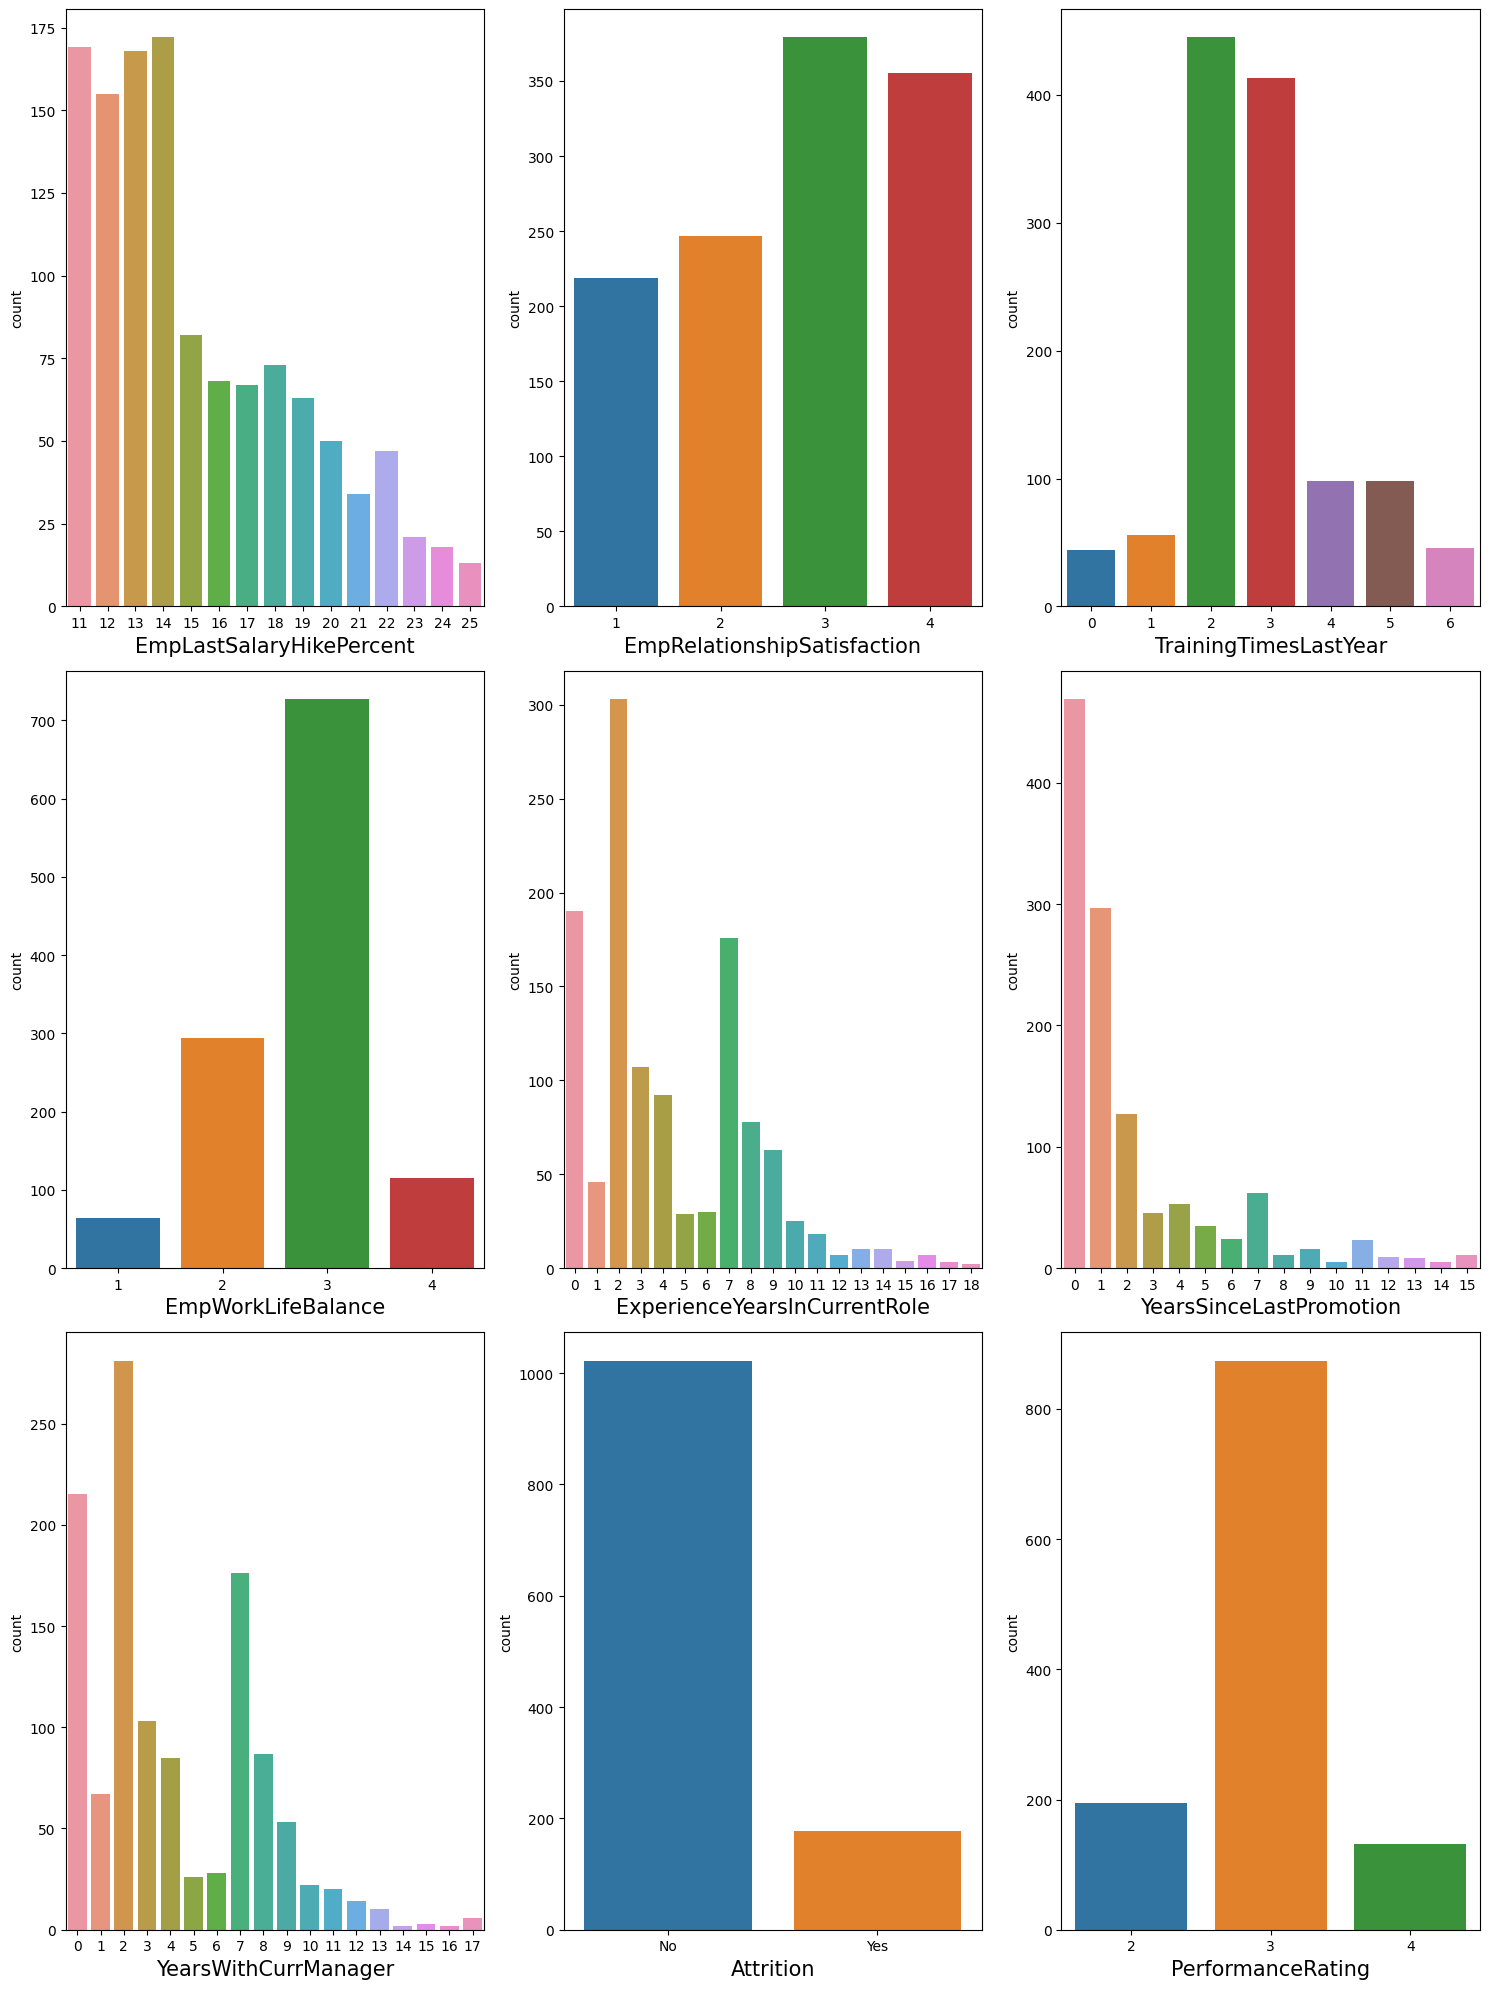

In [15]:
count2 = df1[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition',
               'PerformanceRating']]
plt.figure(figsize=(15,20))
plotno = 1

for column in count2:
    if plotno<=10:
        plt.subplot(3,3,plotno)
        sns.countplot(x=count2[column])
        plt.xlabel(column,fontsize=15)
    plotno+=1
plt.tight_layout()
plt.show()

**17.Employee Last Salary Hike Percent:**


*   The highest number of employees received a salary hike percentage between 11% to 14%, with the overall range of salary hikes falling between 11% to 25%.

*  Less than 80 employees experienced a salary hike between 15% to 19%



**18.Employee Relationship Satisfaction**

*  The employee relationship satisfaction spans from 1 to 4, with a predominant number of employees reporting satisfaction levels of 3 and 4. Additionally, fewer than 250 employees expressed satisfaction levels of 1 and 2 in their workplace relationships.

**19.Training Times LastYear:**



*   Training time in the last year ranges from 0 to 6. The majority of employees have undergone training for the 2nd and 3rd time, with all other instances of training being less than 100 across the board.



**20.Employee Work Life Balance:**



*   The majority of employees report a work-life balance score of 3, while less than 300 employees have a work-life balance score of 2.
*   A minimum work-life balance score of 1 is recorded, with fewer than 100 employees having a score of 4.



**21.Experiance In Current Role:**


*   The highest level of experience in the current role among employees is 18 years.
*   The majority of employees possess 2 years of experience in their current roles, with those having 7 years of experience numbering fewer than 180.
*   Less than 200 employees do not have any experience in their current roles.






**22.Years Since Last Promotion:**


*   The duration since the last promotion spans from 0 to 15 years.

*   The majority of employees have not been promoted in the last year, with fewer than 300 employees having received a promotion of at least 1 year.

**23.Years With Current Manager:**



*   The majority of employees have worked for 2 years with their current manager, and the minimum duration of employment with a manager is 16 years.

*   The range of experience with the current manager varies from 0 to 17 years, with fewer than 180 employees having 7 years of experience with their current manager.




**24.Attrition:**



*   The majority of employees have not left the company, and fewer than 200 employees are planning to leave.


**25.Performance Rating:**



*   The performance rating ranges from 2 to 4, with the majority of employees having a rating of 3, and fewer employees receiving a rating of 4.
*   Less than 200 employees have a performance rating of 2.





**26.Employee Department**


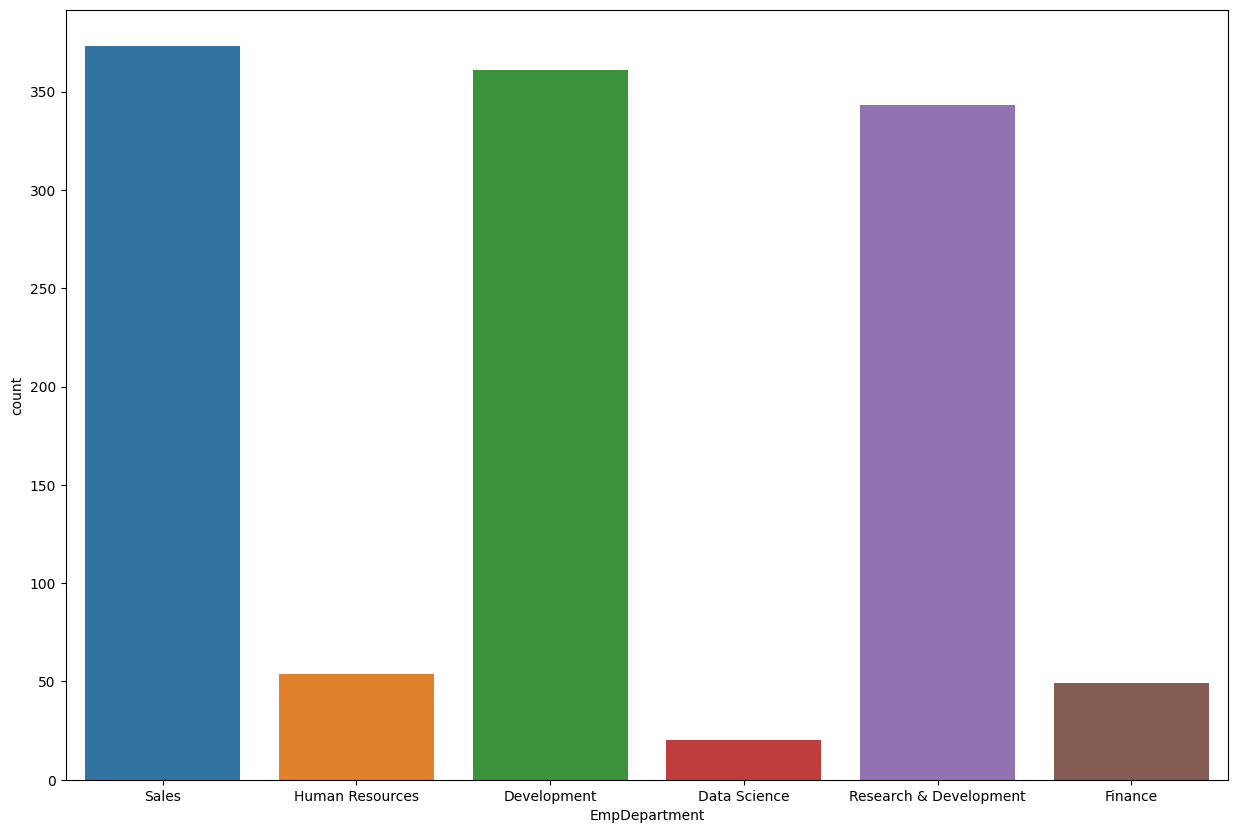

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='EmpDepartment',data=df1)
plt.xlabel('EmpDepartment',fontsize=10)
plt.show()

**Observation:**

*   The majority of employees are from the Sales department, followed closely by the Development and Research & Development departments, each with less than 320 employees.

*   The number of employees in the Human Resources and Finance departments is nearly equal.

*   The Data Science department has the fewest employees in the company.






**27.Employee Job Role**


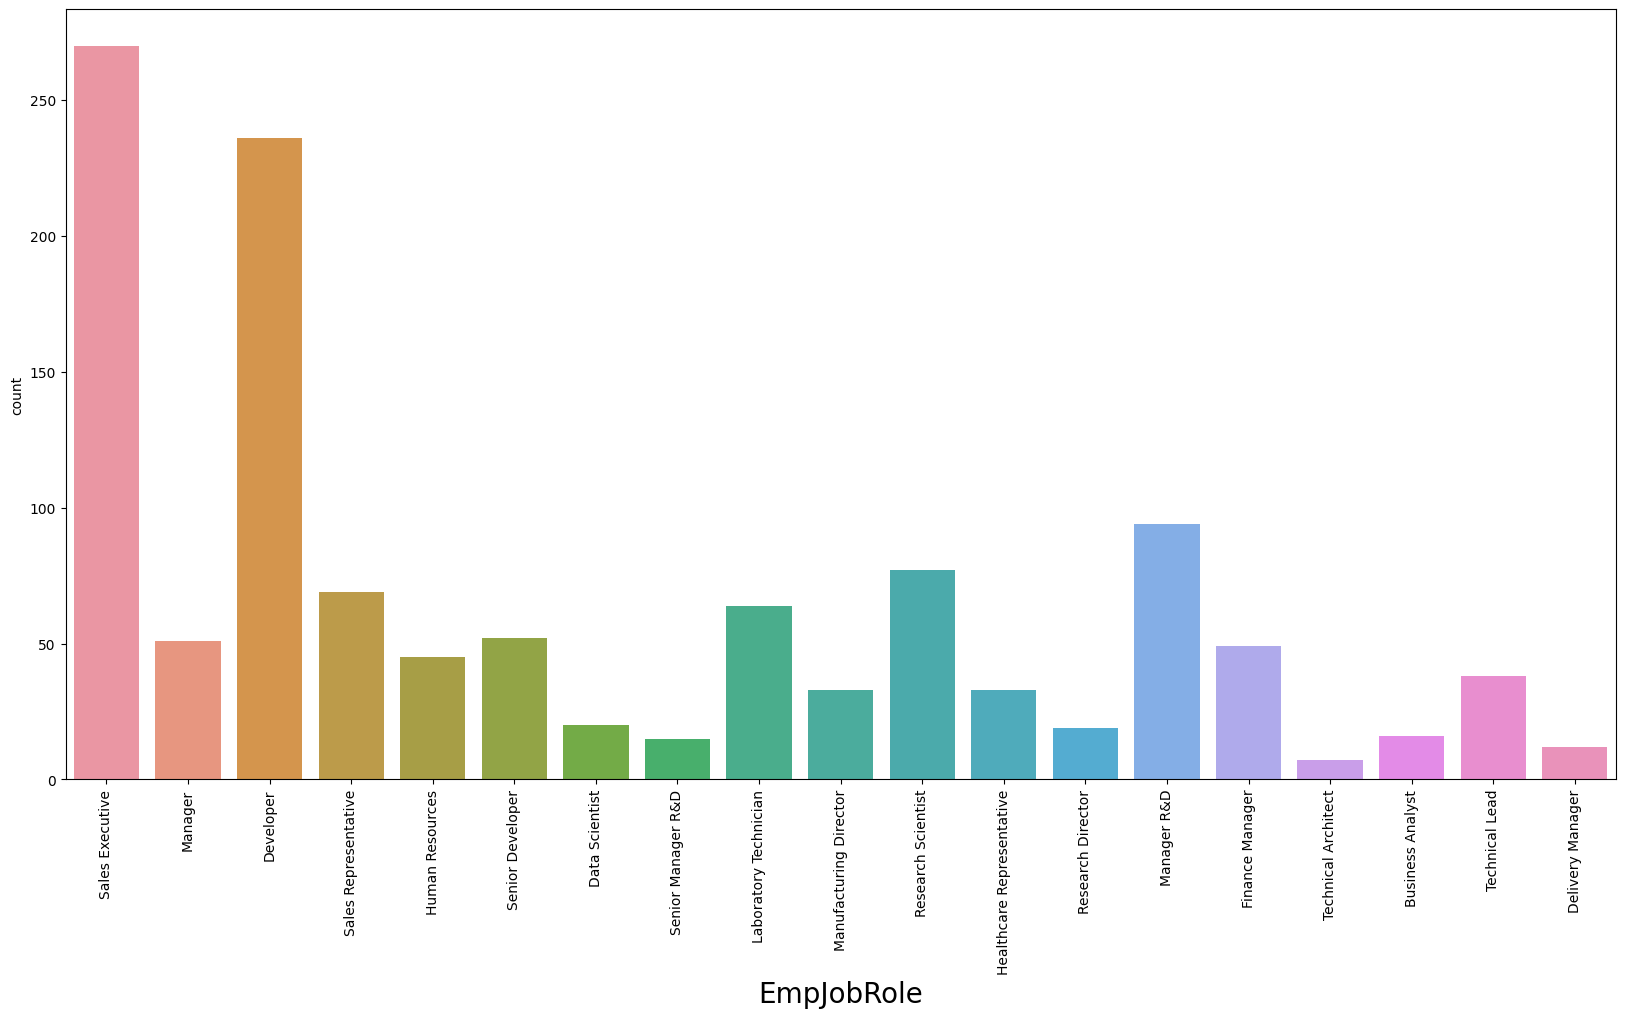

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',data=df1)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

**Observation:**

*   The Sales Executive job role has the highest employee count, and there are exactly 230 employees in the Developer job role.
*   The employee count for Manager R&D and Research Scientist roles is less than 100, while all other job roles have fewer than 65 employees.










.

**Biavariate Analysis**

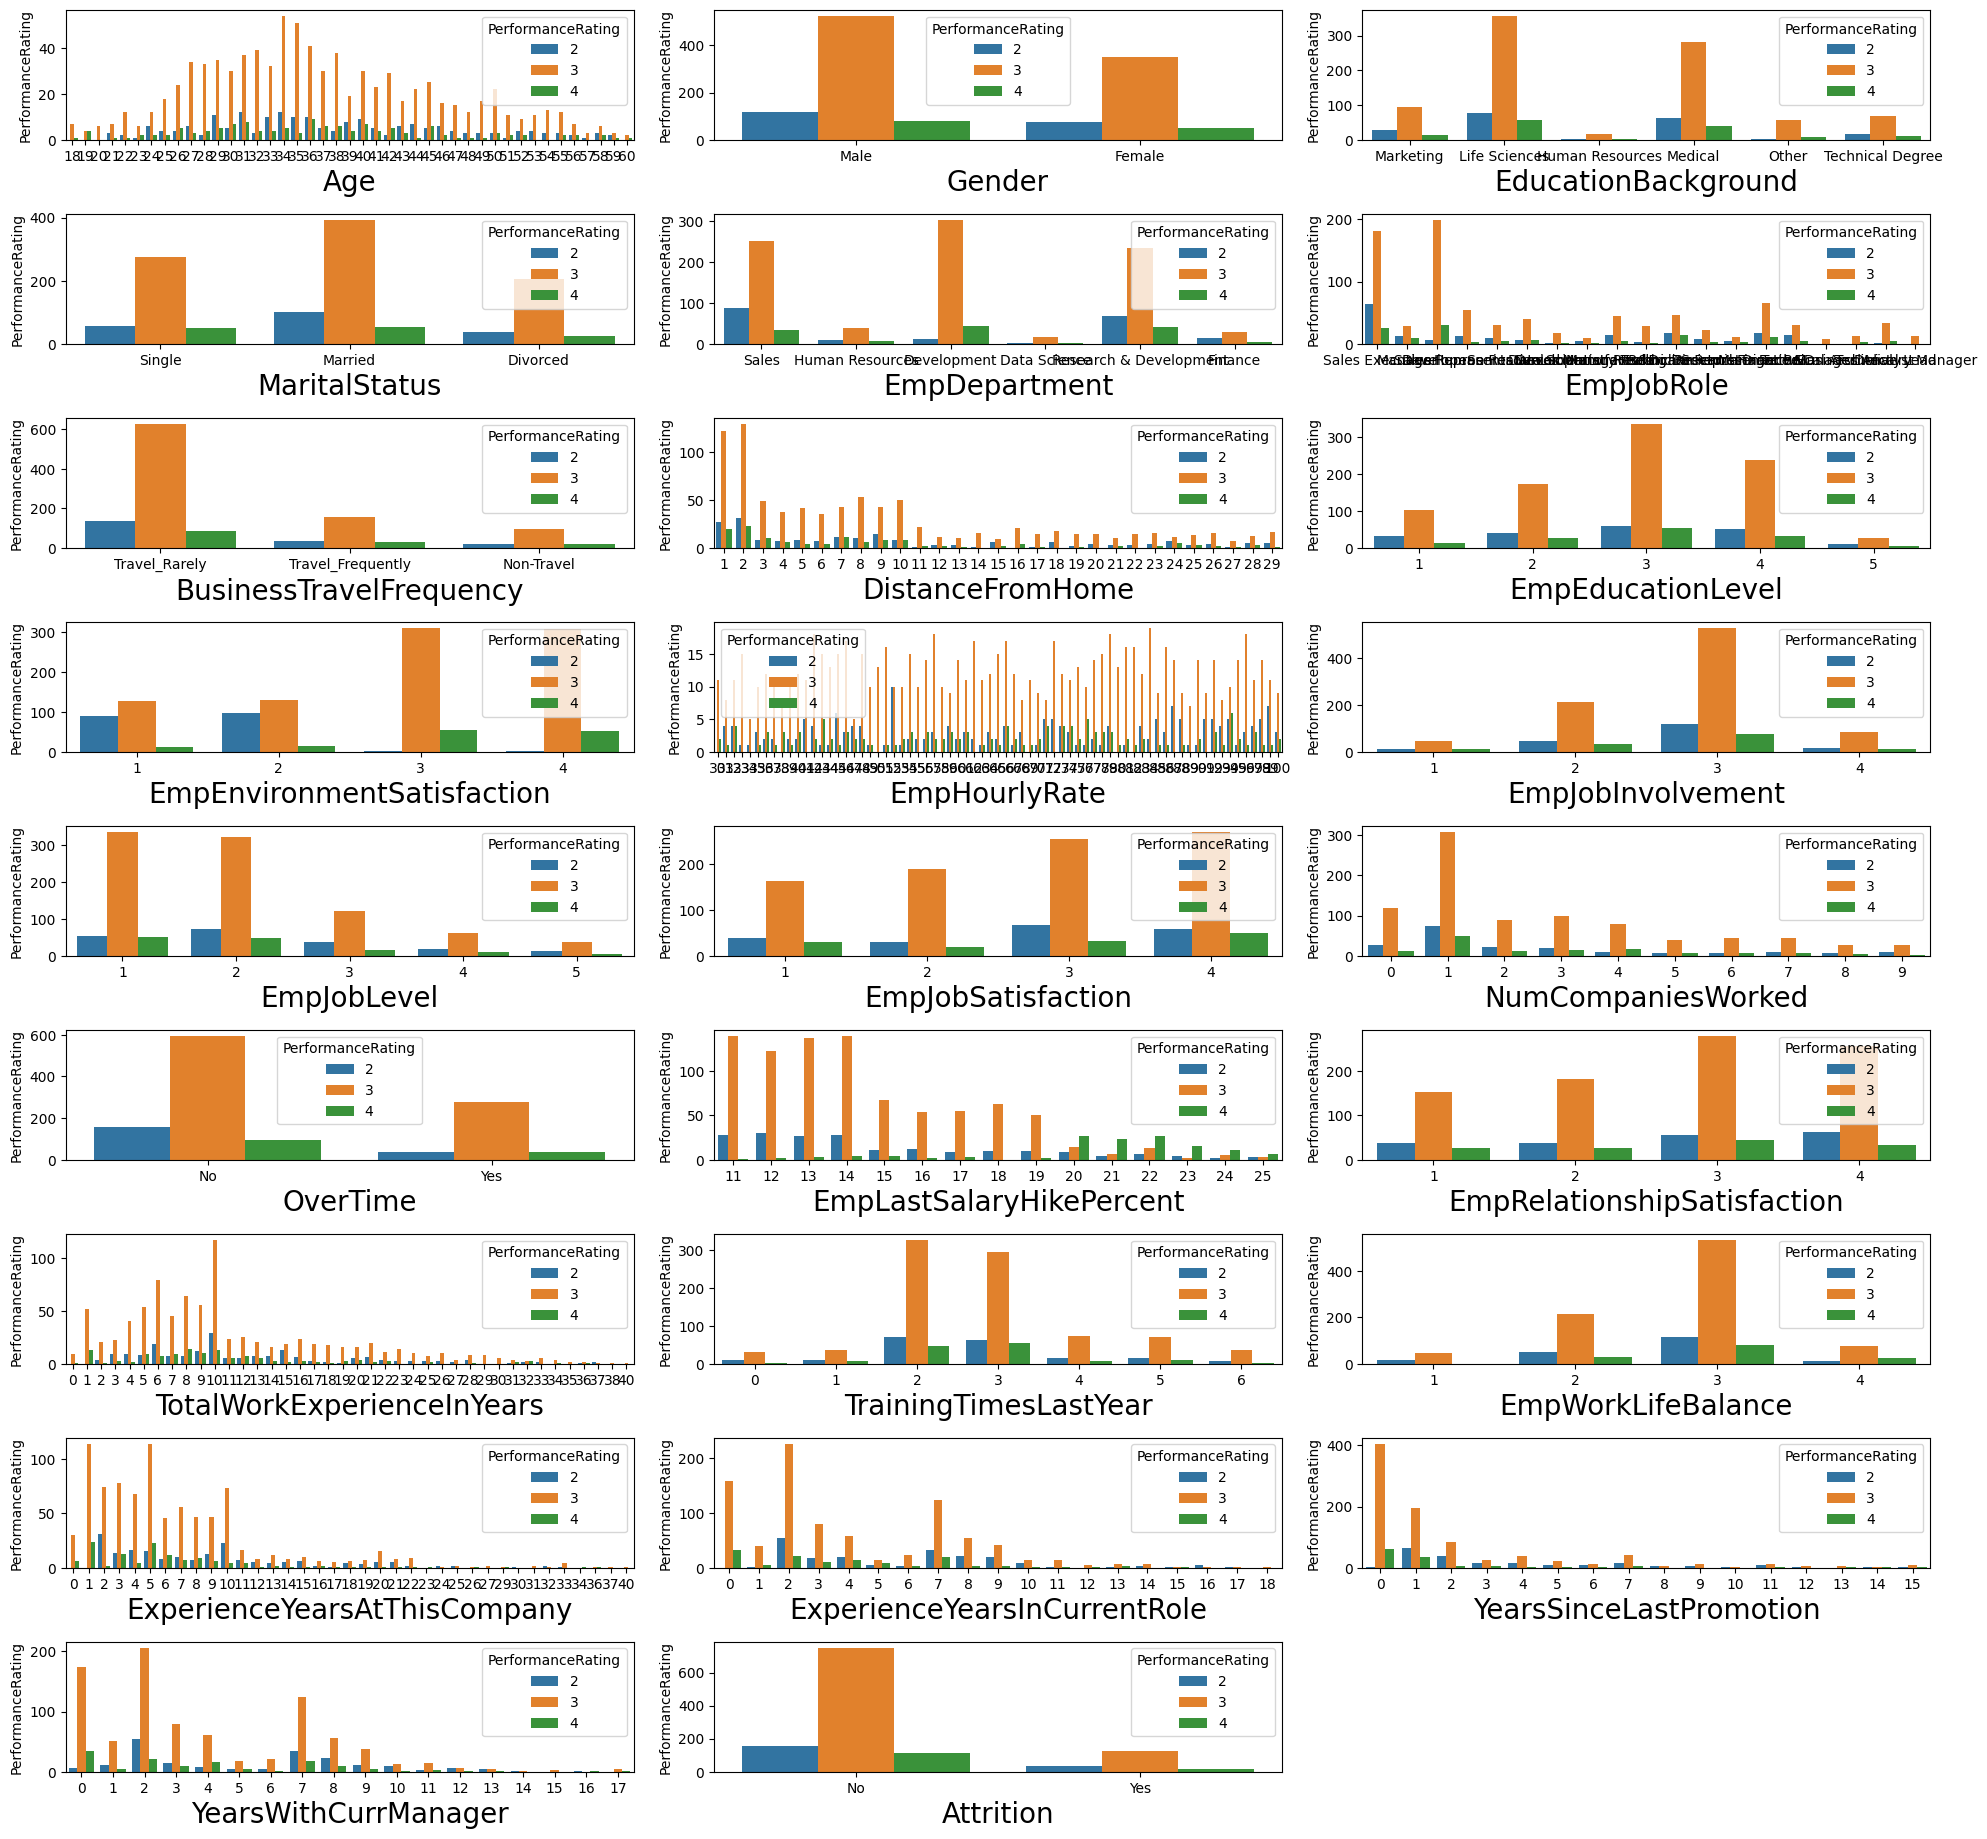

In [18]:
data = df1[['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']]
plt.figure(figsize=(20,22))
plotno = 1

for column in data:
    if plotno<=27:
        plt.subplot(11,3,plotno)
        sns.countplot(x=data[column],hue=df1.PerformanceRating)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PerformanceRating')
    plotno+=1
plt.tight_layout()
plt.show()

**Observations**



**Age VS performance rating**

*   The majority of employees receive a performance rating of 3, with employees aged between 34-35 receiving the highest number of these ratings.

*   The maximum number of employees receive a rating of 4 at the age of 36.

*   At the age of 60, the highest number of employees receive a performance rating of 2.





**Gender VS performance rating**
*   The highest number of males and females are rated with a performance rating of 3.
*  The number of employees, both male and female, receiving a performance rating of 4 is relatively low.











**EducationBackground VS performance rating**


*   Employees with a background in Life Sciences and Medical education are most frequently rated with a performance rating of 3.

*   Employees with backgrounds in Life Sciences and Medical education are also commonly rated with 2 and 4 performance ratings.



**MaritalStatus VS performance rating**


*  Married employees are most commonly rated with a performance rating of 3, and the same holds true for employees with single or divorced marital statuses.

*   Among married employees, there are more instances of a performance rating of 2 compared to single or divorced employees.




**EmpDepartment VS Perfomance rating**

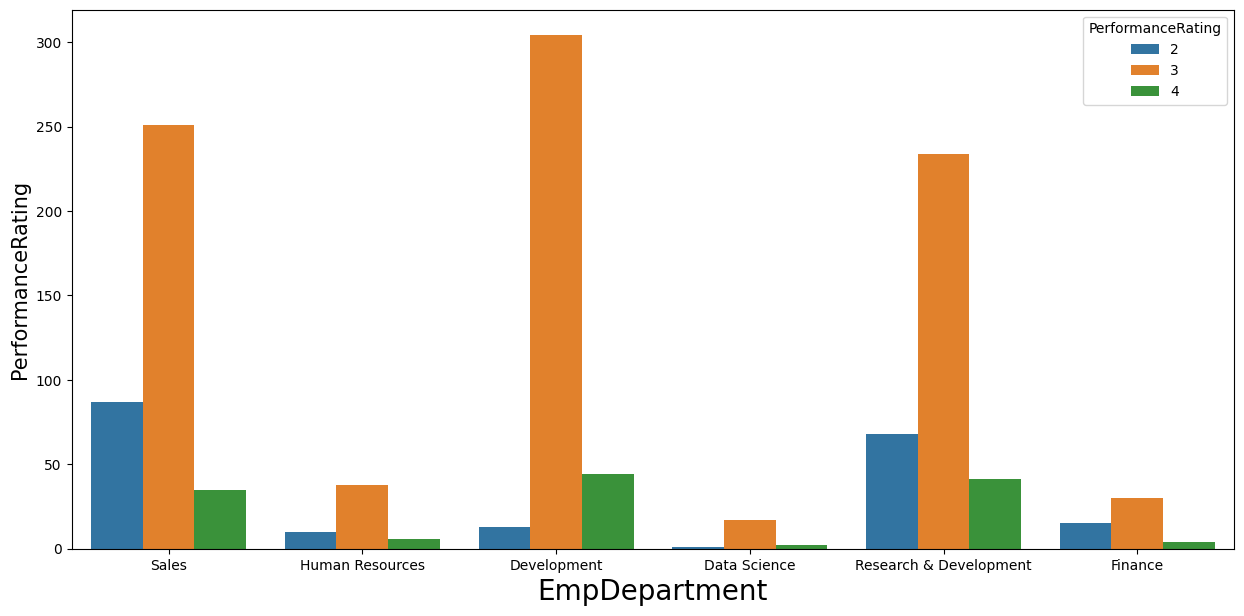

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='EmpDepartment',hue=df1.PerformanceRating,data=df1)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


*  Employees in the Development, Sales, and Research and Development departments most commonly receive a performance rating of 3.
*   Employees in the Data Science department generally receive lower performance ratings.
*   In the Sales and Research and Development departments, employees with a performance rating of 2 are also quite common.













 **Employee job role VS Performance rating**


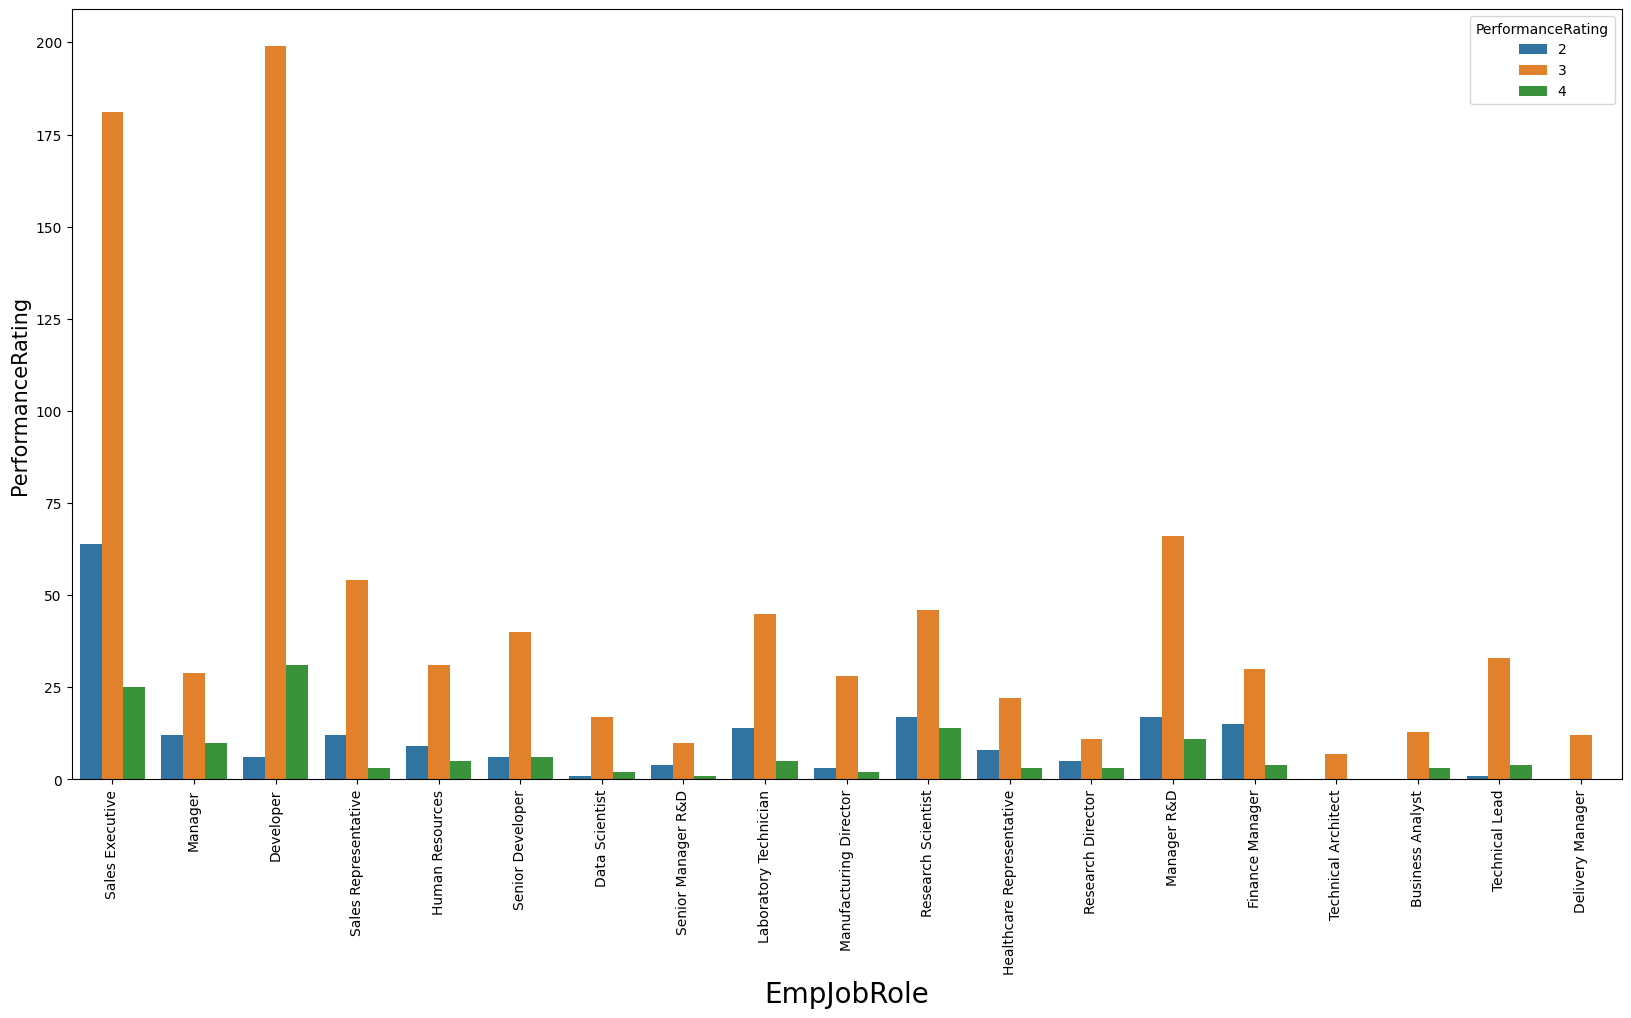

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',hue=df1.PerformanceRating,data=df1)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


*   Employees in roles such as Developers and Sales Executives commonly receive a performance rating of 3.
*   Employees in roles like Technical Architecture and Delivery Manager are rarely rated with 2 and 4 performance ratings.
*   In the Sales Executive role, fewer than 60 employees are rated with a performance rating of 2.
*   Employees in all other roles predominantly receive a performance rating of 3.















**Business Travel Frequency VS performance rating**

*   Employees who rarely travel mostly receive a performance rating of 3.
*   Employees who frequently travel can receive performance ratings of 2, 3, and 4.





**Overtime VS performance rating**


*   Employees without overtime work predominantly receive a performance rating of 3.


*   Employees working overtime consistently receive performance ratings of 2 and 4.


**Attrition VS performance rating**

*   Employees who have not left the company mostly receive a performance rating of 3.
*   Employees with a performance rating of 3 are also leaving the company.



**EmpEducationLevel VS performance rating**


*   Employees with education levels 3, 4, and 2 predominantly receive a performance rating of 3.
*   If the performance rating is 2 or 4, employees from all education levels are fewer than 60.





**EmpEnvironmentSatisfaction VS performance rating**
*   Most employees with environment satisfaction ratings of 3 and 4 receive a performance rating of 3.
*   When employees have environment satisfaction ratings of 1 or 2, the majority of them have a performance rating of 2.
*  As environment satisfaction ratings increase, the number of employees with a performance rating of 4 also increases.








**EmpJobInvolvement VS performance rating**
*   Employees with job involvement levels of 2 and 3 mostly receive a performance rating of 3.
*  Employees with job involvement levels of 2 and 4 have fewer instances of receiving any performance rating.




**EmpJobLevel VS performance rating**
*   Employees with job levels 1, 2, and 3 predominantly receive a performance rating of 3.
*   Across all job levels, the number of employees receiving performance ratings of 2 and 4 is fewer than 60.


**EmpJobSatisfaction VS performance rating**
*   Employees who rate their job satisfaction as 4 or 3 primarily receive a performance rating of 3 most of the time.

*   Among employees with job satisfaction ratings of 2 and 4, the number of employees receiving a performance rating is less than 55.




**EmpWorkLifeBalance VS performance rating**
*   When employees rate their work-life balance as 3, the majority of them receive a performance rating of 3.
*   If the work-life balance is rated as 1, no employee receives a performance rating of 4.










**Drop the Unnecessary Column**


In [21]:
df1.drop("EmpNumber",inplace=True,axis=1)

In [22]:
df1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


**Feature Selection**


*  Many predictor variables are present in the dataset. To identify the important ones, correlation coefficients are calculated. These significant variables are then utilized in training models. Through this process, key factors influencing performance are determined, including Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work-Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, and Years With Current Manager. These features were chosen because their correlation coefficient with Performance Rating exceeded 0.1.
*   Feature transformation involved Standardization and Label Encoding techniques.
*   A comprehensive analysis involving all predictors was conducted. However, this approach led to a decrease in accuracy. Similarly, implementing Principal Component Analysis also resulted in reduced accuracy.



In [23]:
df1.corr()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


<Axes: >

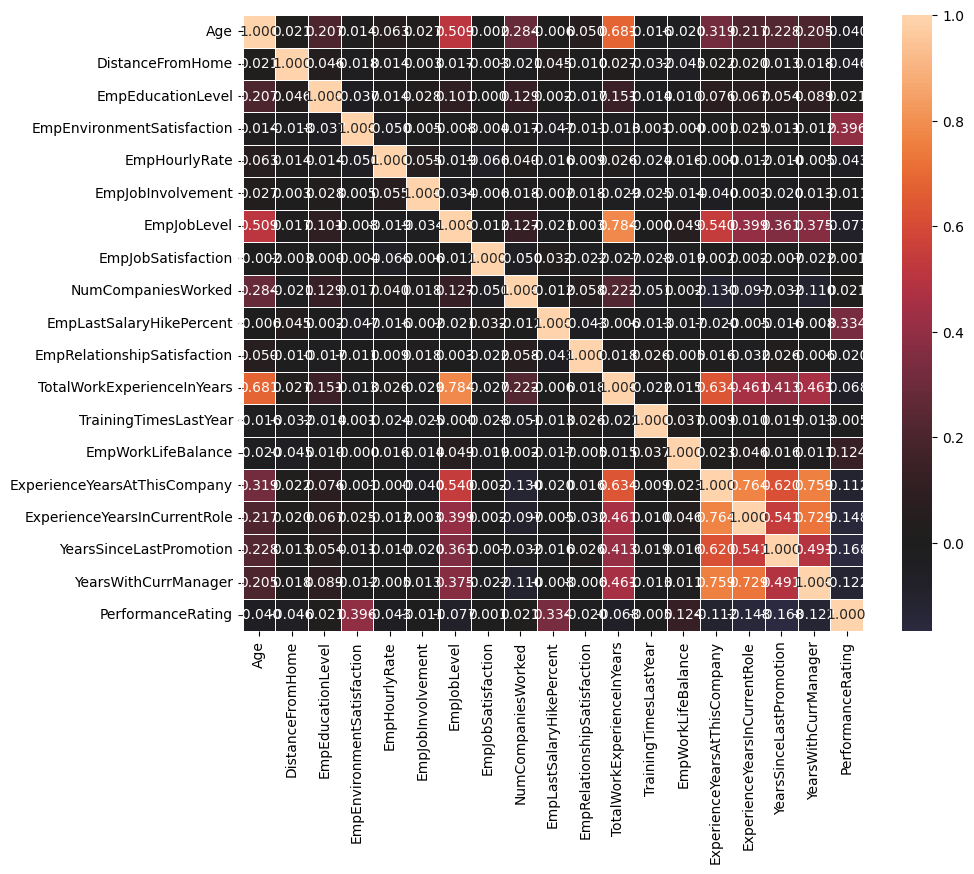

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, fmt='0.3f', center=0,linewidths=.5)

**Observation**

The correlation matrix provides insights into the relationships between different factors and performance ratings:

*   Strong Positive Correlations with Performance: Factors such as total work experience, employee job level, and employee age exhibit robust positive correlations with performance ratings.
*   Strong Negative Correlation with Performance: Employee environment satisfaction is significantly negatively correlated with performance ratings.
*   Moderate Positive Correlations: Factors like employee last salary hike percent, experience years, and years with the current manager demonstrate moderate positive correlations with performance.
*   Weak Correlations: Employee education level and hourly rate display relatively weak correlations with performance.

In summary, age, total work experience, job level, and environment satisfaction have the most substantial impact on performance ratings. Additionally, employee last salary hike percent and experience years also influence performance, although to a lesser extent. Factors like hourly rate and education level have minimal impact on performance ratings.



**Convert categorical variables into numerical format**


In [25]:
lc=LabelEncoder()
df1.Gender=lc.fit_transform(df1.Gender)
df1.EducationBackground=lc.fit_transform(df1.EducationBackground)
df1.MaritalStatus=lc.fit_transform(df1.MaritalStatus)
df1.EmpDepartment=lc.fit_transform(df1.EmpDepartment)
df1.EmpJobRole=lc.fit_transform(df1.EmpJobRole)
df1.BusinessTravelFrequency	=lc.fit_transform(df1.BusinessTravelFrequency)
df1.OverTime	=lc.fit_transform(df1.OverTime)
df1.Attrition=lc.fit_transform(df1.Attrition)
df1.PerformanceRating=lc.fit_transform(df1.PerformanceRating)


In [26]:
df1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,1
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,1
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,2
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,1
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,1


**Divided data into Independent and dependent**

In [27]:
x=df1.drop('PerformanceRating',axis=1)   #defing Independent variables as x
y=df1['PerformanceRating']               #defing Dependent variables as y

In [28]:
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0


**Correlation with target variable**

 In essence, correlation helps us understand how changes in one variable might correspond to changes in another variable. A positive correlation means that when one variable increases, the other variable tends to increase as well, and vice versa. Conversely, a negative correlation suggests that as one variable increases, the other variable tends to decrease, and vice versa. It's a valuable statistical tool for understanding relationships between different factors in various fields of study.

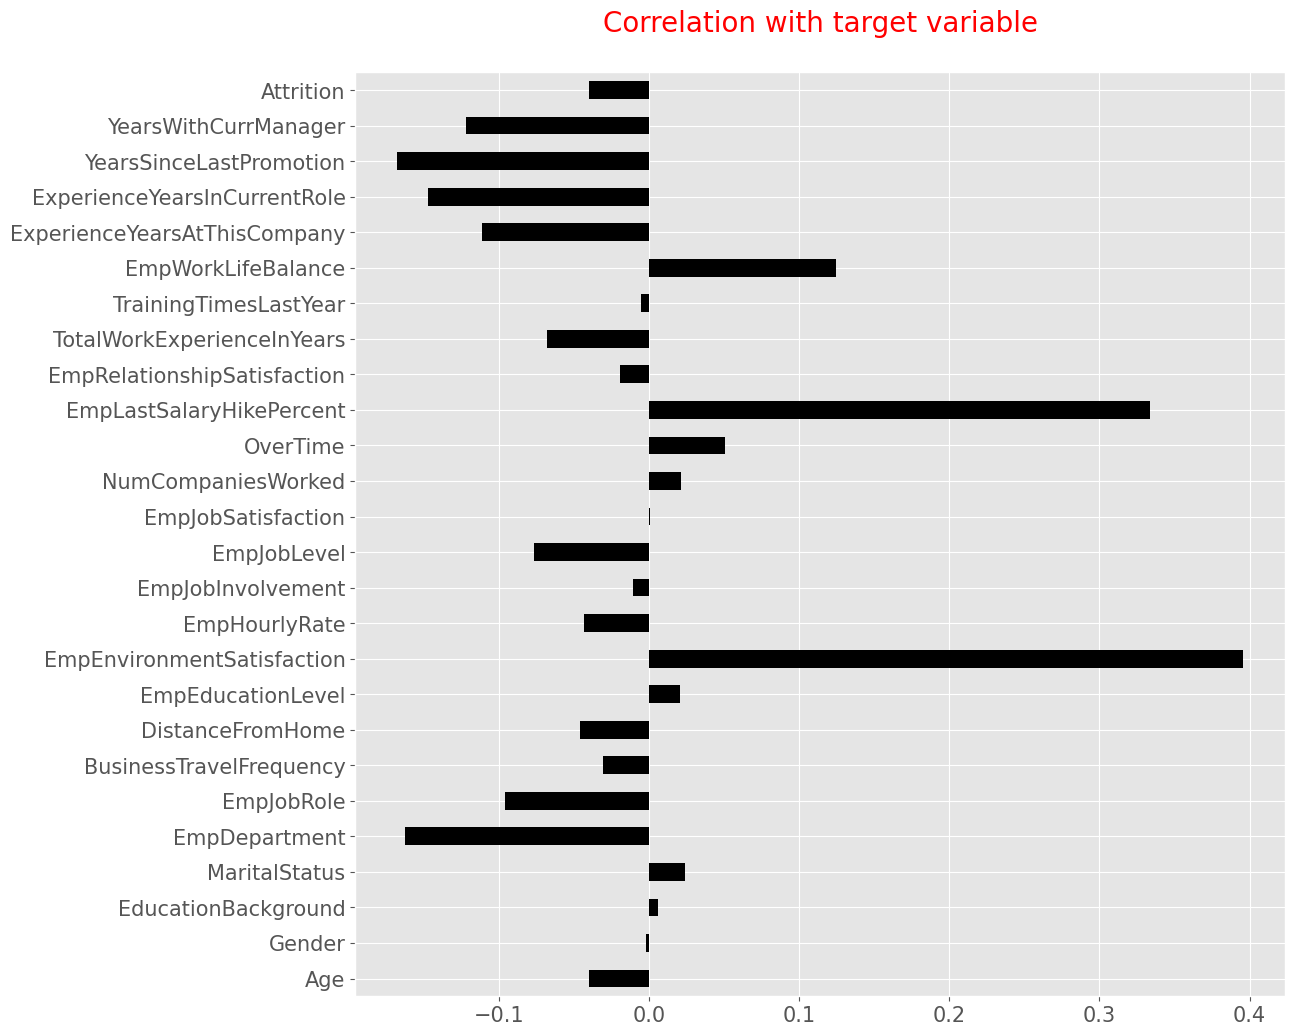

In [29]:
plt.style.use('ggplot')
ax = x.corrwith(y).plot(kind='barh', grid=True, figsize=(12,12),color='Black')
plt.title("Correlation with target variable\n", size=20,color="red")
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.label.set_color('Blue')
ax.yaxis.label.set_color('brown')
plt.show()

Here eight variables are positively correlated with performance rating.

*   Employee Environment Satisfaction
*   Employee Last Salary Hike Percent
*   Education Background
*   Employee Work Life Balance
*   Marital Status
*   Number Companies Worked
*   Employees Education Level



**Checking for Imbalance data**


In [30]:
y.value_counts(normalize=True)*100

1    72.833333
0    16.166667
2    11.000000
Name: PerformanceRating, dtype: float64

From results found data is imbalaanced.

**Converting Imbalance data into balanced data**


In [31]:
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
oversampling = RandomOverSampler()
x,y = oversampling.fit_resample(x,y)
x = pd.DataFrame(x)
x.columns =['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']
x

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,1,2,2,5,13,2,10,3,4,...,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,...,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,...,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,...,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,...,14,4,10,1,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,41,0,2,1,5,13,2,8,3,3,...,21,3,14,3,3,5,4,1,4,0
2618,41,0,2,1,5,13,2,8,3,3,...,21,3,14,3,3,5,4,1,4,0
2619,31,1,1,0,5,8,2,7,3,3,...,21,3,10,3,2,5,4,0,1,0
2620,37,1,0,0,3,6,2,6,4,3,...,22,4,7,3,3,3,2,0,2,1


In [32]:
y.value_counts(normalize=True)*100

1    33.333333
2    33.333333
0    33.333333
Name: PerformanceRating, dtype: float64

Now data is Balanced

**Dividing data into Training and testing**

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [34]:
x_train.head()

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
2181,33,1,2,2,5,13,1,10,3,2,...,14,3,9,6,2,7,7,0,1,0
440,28,1,1,1,4,9,2,29,1,3,...,14,2,8,2,2,8,6,1,7,0
477,38,1,1,1,5,13,2,14,3,3,...,11,4,10,3,3,9,8,7,7,0
2365,45,0,3,2,4,8,1,25,3,2,...,22,3,22,4,3,0,0,0,0,0
2201,34,1,4,2,5,13,2,2,3,4,...,22,3,6,5,3,6,5,1,4,0


**Scaling Data**


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

**PCA**


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
pca.explained_variance_ratio_

array([0.16480725, 0.0691154 , 0.06157882, 0.05321167, 0.0504012 ,
       0.04710842, 0.04483179, 0.04306462, 0.04128814, 0.03985556,
       0.03945156, 0.03591493, 0.03508489, 0.03403981, 0.03325996,
       0.03136816, 0.02949875, 0.02873672, 0.02808057, 0.01857809,
       0.01842124, 0.01656553, 0.01512764, 0.00934382, 0.00657628,
       0.00468918])

**Model Development**


**Logistic Regression**


In [37]:
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(x_train,y_train)

LogisticRegression()

In [38]:
# Predicting the model
y_predict_log = model_logr.predict(x_test)

**Evaluation the model**


In [39]:
print(accuracy_score(y_test,y_predict_log)*100,'%')
print(classification_report(y_test,y_predict_log))

80.0 %
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       185
           1       0.74      0.71      0.73       167
           2       0.86      0.83      0.84       173

    accuracy                           0.80       525
   macro avg       0.80      0.80      0.80       525
weighted avg       0.80      0.80      0.80       525



**Observation**

**Precision**: The ability of the classifier not to label as positive a sample that is negative. Scores: 0.76 (class 2), 0.71 (class 3), 0.87 (class 4).

**Recall:** The ability of the classifier to find all the positive samples. Scores: 0.83 (class 2), 0.70 (class 3), 0.80 (class 4).

**F1-Score:** The harmonic mean of precision and recall. Scores: 0.79 (class 2), 0.70 (class 3), 0.83 (class 4).

**Accuracy:** The proportion of correctly classified instances. Accuracy is 78%.



In [40]:
confusion_matrix(y_test,y_predict_log)

array([[158,  19,   8],
       [ 32, 119,  16],
       [  7,  23, 143]])

**observation**

**Class 1:** 153 true positives (correctly predicted as class 1), 35 false negatives (misclassified as class 2), 13 false negatives (misclassified as class 3).

**Class 2:** 117 true positives, 26 false negatives, 22 false positives (misclassified as class 1), 15 false negatives.

**Class 3:** 138 true positives, 6 false positives, 15 false positives, 26 false negatives.

Checking the Train score

In [41]:
y_train_pred=model_logr.predict(x_train)
y_train_pred
acc_train=accuracy_score(y_train,y_train_pred)
print("Train Accuracy" ,acc_train * 100,'%')

Train Accuracy 80.4959465903672 %


Checking the Test score

In [42]:
y_test_pred=model_logr.predict(x_test)
y_test_pred
acc_test=accuracy_score(y_test,y_test_pred)
print("Test Accuracy",acc_test * 100, "%")

Test Accuracy 80.0 %


**SVM**

In [43]:
from sklearn.svm import SVC
svc=SVC() # base model with default parameters
svc.fit(x_train,y_train)

SVC()

In [44]:
y_predict_svc = svc.predict(x_test)

**Evaluate the model**

In [45]:
print(accuracy_score(y_test,y_predict_svc)*100,'%')
print(classification_report(y_test,y_predict_svc))

93.52380952380952 %
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       185
           1       0.97      0.83      0.89       167
           2       0.96      1.00      0.98       173

    accuracy                           0.94       525
   macro avg       0.94      0.93      0.93       525
weighted avg       0.94      0.94      0.93       525



**observation**

**Precision:** High for all classes, indicating a low false positive rate. Particularly high for class 2 and 4 (88% and 95% respectively), and slightly lower but still impressive for class 3 (95%).

**Recall:** Generally strong, with class 2 having near-perfect recall (99%) and class 4 also performing very well (97%). Class 3 has a slightly lower recall at 81% but is still good.

**F1-Score:** Harmonic mean of precision and recall is excellent for all classes, indicating a good balance between precision and recall. Highest for class 4 (96%) and slightly lower for class 3 (87%).

**Accuracy:** Overall accuracy is 92%, indicating the proportion of correctly classified instances.

In [46]:
confusion_matrix(y_test,y_predict_svc)

array([[180,   5,   0],
       [ 21, 138,   8],
       [  0,   0, 173]])

**observation**

**Class 1:** 183 true positives, 24 false negatives, 1 false positive.

**Class 2:** 135 true positives, 2 false positives, 5 false negatives.

**Class 3:** 167 true positives, 8 false negatives, 0 false positives

Checking the Train score

In [47]:
y_train_pred=svc.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  96.90033381020505 %


Checking the Test score

In [48]:
y_test_pred=svc.predict(x_test)
print('The Test accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Test accuracy :  93.52380952380952 %


**Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree
dt=DecisionTreeClassifier() # object creation for decision tree
dt.fit(x_train,y_train)# training the model

DecisionTreeClassifier()

In [50]:
y_predict_dt=dt.predict(x_test)

**Evaluate the model**


In [51]:
print(accuracy_score(y_test,y_predict_dt)*100,'%')
print(classification_report(y_test,y_predict_dt))

91.61904761904762 %
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       185
           1       1.00      0.74      0.85       167
           2       0.91      1.00      0.95       173

    accuracy                           0.92       525
   macro avg       0.93      0.91      0.91       525
weighted avg       0.93      0.92      0.91       525



**observation**

**Precision:** High for all classes, indicating a low false positive rate. Class 3 has the highest precision (99%), followed closely by classes 2 (88%) and 4 (90%).

**Recall:** Varied but generally good. Class 2 has excellent recall (99%), class 4 also performs well (100%), while class 3 has slightly lower recall at 74%.

**F1-Score:** Harmonic mean of precision and recall is high for all classes, indicating a good balance between precision and recall. Class 4 has the highest F1-score (95%), followed by classes 2 (93%) and 3 (85%).

Accuracy: Overall accuracy is 91%, showing the proportion of correctly classified instances.

In [52]:
confusion_matrix(y_test,y_predict_dt)

array([[185,   0,   0],
       [ 27, 123,  17],
       [  0,   0, 173]])

**observation**

**Class 1:** 184 true positives, 25 false negatives, 1 false positive.

**Class 2:** 123 true positives, 19 false positives, 25 false negatives.

**Class 3:** 173 true positives, 0 false positives, 0 false negatives.


Checking the Train score

In [53]:
y_train_pred=dt.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  100.0 %


Checking the Test score

In [54]:
y_test_pred=dt.predict(x_test)
print('The Test accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Test accuracy :  91.61904761904762 %


**Random Forest**


In [55]:
from sklearn.ensemble import RandomForestClassifier
rfclass=RandomForestClassifier(n_estimators=87)
rfclass.fit(x_train,y_train)

RandomForestClassifier(n_estimators=87)

In [56]:
y_predict_rf=rfclass.predict(x_test)

**Evaluate the model**

In [57]:
print(accuracy_score(y_test,y_predict_rf)*100,'%')
print(classification_report(y_test,y_predict_rf))

98.47619047619047 %
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       185
           1       0.99      0.96      0.98       167
           2       0.99      1.00      0.99       173

    accuracy                           0.98       525
   macro avg       0.99      0.98      0.98       525
weighted avg       0.98      0.98      0.98       525



**Observation**

**Precision:** Very high across all classes, indicating very few false positives. Class 3 has the lowest precision (93%), still impressive.

**Recall:** Generally high, indicating the model captures most positive instances. Class 3 has the lowest recall (93%), suggesting a few false negatives.

**F1-Score:** Harmonic mean of precision and recall is very high for all classes, indicating a balanced trade-off between precision and recall.

**Accuracy:** Exceptional at 98%, indicating the proportion of correctly classified instances.

In [58]:
confusion_matrix(y_test,y_predict_rf)

array([[184,   1,   0],
       [  5, 160,   2],
       [  0,   0, 173]])

**Observation**

**Class 1:** 185 true positives, 0 false negatives, 0 false positives.

**Class 2:** 156 true positives, 1 false positive, 10 false negatives.

**Class 3:** 173 true positives.

Checking the Train score

In [59]:
y_train_pred=rfclass.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  100.0 %


Checking the Test score

In [60]:
y_test_pred=rfclass.predict(x_test)
print('The Test accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Test accuracy :  98.47619047619047 %



**XGBoost**

In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
y_predict_xgb=xgb.predict(x_test)

In [63]:
print(accuracy_score(y_test,y_predict_xgb)*100,'%')
print(classification_report(y_test,y_predict_xgb))

97.33333333333334 %
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       185
           1       1.00      0.92      0.96       167
           2       0.99      1.00      0.99       173

    accuracy                           0.97       525
   macro avg       0.98      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



**Observation**

**Precision:**

**Class 0:** 95% precision, indicating that 95% of the instances predicted as class 0 were correct.
**Class 1:** 99% precision, suggesting a high accuracy of positive predictions for class 1.
**Class 2:** 96% precision, demonstrating the model's accuracy in predicting class 2 instances.

**Recall:**

**Class 0:** 99% recall, indicating that 99% of the actual class 0 instances were correctly predicted.

**Class 1:** 90% recall, indicating that 90% of the actual class 1 instances were correctly predicted.

**Class 2:** 100% recall, suggesting that all actual class 2 instances were correctly predicted.

**F1-Score:**

**Class 0:** 97% F1-score, a balanced measure of precision and recall for class 0.

**Class 1:** 94% F1-score, indicating a good balance between precision and recall for class 1.

**Class 2:** 98% F1-score, demonstrating a high balance between precision and recall for class 2.

**Support:**

**Class 0:** 185 instances in the dataset for class 0.

**Class 1:** 167 instances in the dataset for class 1.

**Class 2:** 173 instances in the dataset for class 2.

**Overall Metrics:**

**Accuracy:** The model achieved an overall accuracy of 97%, indicating that 97% of all predictions were correct.

**Macro Avg (Macro-Averaged Metrics):** The macro-average precision, recall, and F1-score are 97%, 96%, and 96%, respectively. This metric calculates the average performance across all classes, giving equal weight to each class.

**Weighted Avg (Weighted-Averaged Metrics):** The weighted-average precision, recall, and F1-score are 97%, 97%, and 97%, respectively. This metric calculates the average performance across all classes, with each class's contribution weighted by its presence in the dataset.

**Conclusion:**

The model exhibits strong predictive capabilities across all classes, with high precision, recall, and F1-scores. It demonstrates accurate classification across the three classes (0, 1, and 2) and achieves an overall accuracy of 97%. These results indicate a robust and reliable performance in the multiclass classification task.



In [64]:
confusion_matrix(y_test,y_predict_xgb)

array([[185,   0,   0],
       [ 12, 153,   2],
       [  0,   0, 173]])

**observation**

**Class 0:**

**True Positives (TP):** 184 instances were correctly classified as Class 0.

**False Positives (FP):** 1 instance from other classes was misclassified as Class 0.

**False Negatives (FN):** 0 instances of Class 0 were misclassified as other classes.

**Class 1:**

**True Positives (TP):** 150 instances were correctly classified as Class 1.

**False Positives (FP):** 10 instances from other classes were misclassified as Class 1.

**False Negatives (FN):** 7 instances of Class 1 were misclassified as other classes.

**Class 2**:

**True Positives (TP):** 173 instances were correctly classified as Class 2.

**False Positives (FP):** 0 instances from other classes were misclassified as Class 2.

**False Negatives (FN):** 0 instances of Class 2 were misclassified as other classes.

**Interpretation:**

*   The model performs well in distinguishing Class 2, with no false positives or false negatives for this class.

*   Class 0 also has a strong performance, with only 1 false positive.

*   Class 1 has a moderate performance, with 10 false positives and 7 false negatives, indicating some difficulty in distinguishing this class from others.












Checking the Train score

In [65]:
y_train_pred=xgb.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  100.0 %


Checking the Test score

In [66]:
y_test_pred=xgb.predict(x_test)
print('The Test accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Test accuracy :  97.33333333333334 %


**K-Nearest Neighbor**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
model_knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [68]:
# Predicting the model
y_predict_knn = model_knn.predict(x_test)

In [69]:
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8019047619047619
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       185
           1       0.83      0.53      0.64       167
           2       0.83      0.92      0.87       173

    accuracy                           0.80       525
   macro avg       0.81      0.80      0.79       525
weighted avg       0.81      0.80      0.79       525



**Observation**

**Class 0:**

Precision: 0.76
Recall: 0.95
F1-Score: 0.84
Support: 185

**Class 1:**

Precision: 0.86
Recall: 0.56
F1-Score: 0.68
Support: 167

**Class 2:**

Precision: 0.83
Recall: 0.90
F1-Score: 0.86
Support: 173
Accuracy: 0.81

**Macro Avg (Macro-Averaging):** The average of precision, recall, and F1-score across all classes. Macro avg values are 0.82 (precision), 0.80 (recall), and 0.79 (F1-score).

**Weighted Avg (Weighted-Averaging):** The weighted average of precision, recall, and F1-score, considering class support. Weighted avg values are 0.82 (precision), 0.81 (recall), and 0.80 (F1-score).

**Interpretation:**


*   For Class 0, the model has good precision (0.76) and excellent recall (0.95), indicating that it correctly identifies most instances of Class 0 with relatively few false positives.

*   For Class 1, precision is higher (0.86) but recall is lower (0.56), suggesting that while it's good at correctly identifying Class 1 instances, it misses some, resulting in a trade-off between precision and recall.


*   For Class 2, both precision (0.83) and recall (0.90) are relatively high, indicating a good balance between precision and recall.

The overall accuracy of the model is 0.81, which is the proportion of correctly classified instances across all classes.


In [70]:
confusion_matrix(y_test,y_predict_knn)

array([[173,  10,   2],
       [ 48,  88,  31],
       [  5,   8, 160]])

**Observation**

**Class 0:**

True Positives (TP): 175
False Positives (FP): 5
False Negatives (FN): 5

**Class 1:**

True Positives (TP): 93
False Positives (FP): 48
False Negatives (FN): 26

**Class 2:**

True Positives (TP): 155
False Positives (FP): 10
False Negatives (FN): 8

**Interpretation:**

Class 0: The model correctly identified 175 instances of Class 0. It incorrectly classified 5 instances of Class 1 as Class 0 (false positives) and missed 5 instances of Class 0 (false negatives).

Class 1: The model correctly identified 93 instances of Class 1. It incorrectly classified 48 instances of Class 0 as Class 1 and missed 26 instances of Class 1.

Class 2: The model correctly identified 155 instances of Class 2. It incorrectly classified 10 instances of Class 0 as Class 2 and missed 8 instances of Class 2.


Checking the Train score

In [71]:
y_train_pred=model_knn.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  86.45684310920363 %


Checking the Test score

In [72]:
y_test_pred=model_knn.predict(x_test)
print('The Train accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Train accuracy :  80.19047619047619 %


**Naive Bayes Bernoulli**

In [73]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [74]:
y_predict_nb = model_nb.predict(x_test)

**Evaluate the model**

In [75]:
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.700952380952381
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       185
           1       0.68      0.64      0.66       167
           2       0.72      0.76      0.74       173

    accuracy                           0.70       525
   macro avg       0.70      0.70      0.70       525
weighted avg       0.70      0.70      0.70       525



**Observation**

**Class 0:**

**Precision:** 0.69 (69% of instances predicted as Class 0 were actually Class 0)

**Recall:** 0.61 (61% of actual Class 0 instances were correctly predicted)

**F1-Score:** 0.65 (harmonic mean of precision and recall for Class 0)

**Support:** 185 instances

**Class 1:**

**Precision:** 0.61 (61% of instances predicted as Class 1 were actually Class 1)

**Recall:** 0.65 (65% of actual Class 1 instances were correctly predicted)

**F1-Score:** 0.63 (harmonic mean of precision and recall for Class 1)

**Support:** 167 instances

**Class 2:**

**Precision:** 0.70 (70% of instances predicted as Class 2 were actually Class 2)

**Recall:** 0.75 (75% of actual Class 2 instances were correctly predicted)

**F1-Score:** 0.72 (harmonic mean of precision and recall for Class 2)

**Support:** 173 instances

**Overall Metrics:**

**Accuracy:** 67% (proportion of correctly classified instances across all classes)

**Macro Avg Precision:** 0.67 (average precision across all classes)

**Macro Avg Recall:** 0.67 (average recall across all classes)

**Macro Avg F1-Score:** 0.67 (average F1-score across all classes)

**Weighted Avg Precision:** 0.67 (precision averaged by the number of samples in each class)

**Weighted Avg Recall:** 0.67 (recall averaged by the number of samples in each class)

**Weighted Avg F1-Score**: 0.67 (F1-score averaged by the number of samples in each class)

**Interpretation:**

The model shows moderate performance across all classes, with F1-scores ranging from 0.63 to 0.72. Class 2 (precision: 70%, recall: 75%) performs slightly better than Class 0 (precision: 69%, recall: 61%) and Class 1 (precision: 61%, recall: 65%). The weighted average metrics indicate that the model's performance is balanced across classes, with no significant class imbalance affecting the overall evaluation. The model correctly classifies 67% of the  in the dataset.






In [76]:
confusion_matrix(y_test,y_predict_nb)

array([[129,  30,  26],
       [ 35, 107,  25],
       [ 21,  20, 132]])

**Observation**

**Class 0:**

Correctly predicted: 113 instances
Misclassified as Class 1: 40 instances
Misclassified as Class 2: 32 instances

**Class 1:**

Correctly predicted: 108 instances
Misclassified as Class 0: 35 instances
Misclassified as Class 2: 24 instances

**Class 2:**

Correctly predicted: 130 instances
Misclassified as Class 0: 15 instances
Misclassified as Class 1: 28 instances

**Interpretation:**

**Class 0:**

The model has a higher tendency to misclassify Class 0 instances as Class 1 and Class 2.
True Positives (Correctly Predicted Class 0): 113 instances
Misclassifications: 40 instances as Class 1 and 32 instances as Class 2

**Class 1:**

The model has a higher tendency to misclassify Class 1 instances as Class 0.
True Positives (Correctly Predicted Class 1): 108 instances
Misclassifications: 35 instances as Class 0 and 24 instances as Class 2

**Class 2:**

The model has a relatively balanced performance for Class 2.
True Positives (Correctly Predicted Class 2): 130 instances
Misclassifications: 15 instances as Class 0 and 28 instances as Class 1

The model seems to have the most difficulty distinguishing Class 0 and Class 1, with a considerable number of misclassifications between these two classes.



Checking the Train score

In [77]:
y_train_pred=model_nb.predict(x_train)
print('The Train accuracy : ',accuracy_score(y_train,y_train_pred)*100,'%')

The Train accuracy :  67.23891273247496 %


Checking the Test score

In [78]:
y_test_pred=model_nb.predict(x_test)
print('The Train accuracy : ',accuracy_score(y_test,y_test_pred)*100,'%')

The Train accuracy :  70.0952380952381 %


**Building different Models and validating using 10 fold cross validation**

In [79]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Bernoulli', BernoulliNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('XGB', XGBClassifier(n_estimators = 120)))

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

In [81]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.7954249259512418
KNN: 0.8016290726817044
Decison-Tree: 0.8988926862611073
Bernoulli: 0.6590271132376395
SVM: 0.9208589655958077
RandForest: 0.9346958304853044
XGB: 0.9461244019138755


**Conclusion**

*   The Random Forest model achieved the highest accuracy at 98%, indicating outstanding performance in classifying instances into their respective classes. It displayed excellent precision, recall, and F1-scores across all classes.

*   XGBoost also performed exceptionally well with an accuracy of 97% and demonstrated a strong balance between precision and recall for all classes.

*   Support Vector Machine (SVM) showed robust performance with an accuracy of 92% and maintained high precision, recall, and F1-scores for all classes.

*   Decision Tree and K-Nearest Neighbors (KNN) models performed reasonably well with accuracies of 91% and 81%, respectively, and balanced precision and recall metrics.

*   Logistic Regression provided a good baseline with 78% accuracy, while Naive Bayes (Bernoulli) showed moderate performance with 67% accuracy.


**Based on these results, the Random Forest, XGBoost, and SVM models are recommended for this classification task due to their high accuracy and balanced performance across all classes.**